In [82]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# read data
raw_data = pd.read_csv("music_genre/dataset.csv")

In [4]:
# head, info, describe, null values
raw_data.head(10)

Unnamed: 0                track_id                               artists  ...    tempo time_signature  track_genre
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino  ...   87.917              4     acoustic
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward  ...   77.489              4     acoustic
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN  ...   76.332              4     acoustic
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis  ...  181.740              3     acoustic
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet  ...  119.949              4     acoustic
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells  ...   98.017              4     acoustic
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera  ...  141.284              3     acoustic
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz  ...  150.960              4     acoustic
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat  ...  130.088              4     acoustic
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman  ...   78.899              4     acoustic

[10 rows x 21 columns]

In [5]:
raw_data.describe()

Unnamed: 0     popularity   duration_ms  ...        valence          tempo  time_signature
count  114000.000000  114000.000000  1.140000e+05  ...  114000.000000  114000.000000   114000.000000
mean    56999.500000      33.238535  2.280292e+05  ...       0.474068     122.147837        3.904035
std     32909.109681      22.305078  1.072977e+05  ...       0.259261      29.978197        0.432621
min         0.000000       0.000000  0.000000e+00  ...       0.000000       0.000000        0.000000
25%     28499.750000      17.000000  1.740660e+05  ...       0.260000      99.218750        4.000000
50%     56999.500000      35.000000  2.129060e+05  ...       0.464000     122.017000        4.000000
75%     85499.250000      50.000000  2.615060e+05  ...       0.683000     140.071000        4.000000
max    113999.000000     100.000000  5.237295e+06  ...       0.995000     243.372000        5.000000

[8 rows x 15 columns]

In [6]:
raw_data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
# no null values are available

In [24]:
# copy the process data and drop track_id, unname, artists, album and track anme columns
process_data = raw_data.copy()

In [25]:
process_data.drop(columns=process_data.iloc[:, 0:5], inplace=True)
process_data

popularity  duration_ms  explicit  danceability  ...  valence    tempo  time_signature  track_genre
0               73       230666     False         0.676  ...   0.7150   87.917               4     acoustic
1               55       149610     False         0.420  ...   0.2670   77.489               4     acoustic
2               57       210826     False         0.438  ...   0.1200   76.332               4     acoustic
3               71       201933     False         0.266  ...   0.1430  181.740               3     acoustic
4               82       198853     False         0.618  ...   0.1670  119.949               4     acoustic
...            ...          ...       ...           ...  ...      ...      ...             ...          ...
113995          21       384999     False         0.172  ...   0.0339  125.995               5  world-music
113996          22       385000     False         0.174  ...   0.0350   85.239               4  world-music
113997          22       271466     False         0.629  ...   0.7430  132.378               4  world-music
113998          41       283893     False         0.587  ...   0.4130  135.960               4  world-music
113999          22       241826     False         0.526  ...   0.7080   79.198               4  world-music

[114000 rows x 16 columns]

In [10]:
# control null values
process_data.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [26]:
# EDA
process_data = process_data.iloc[0:10000, :]

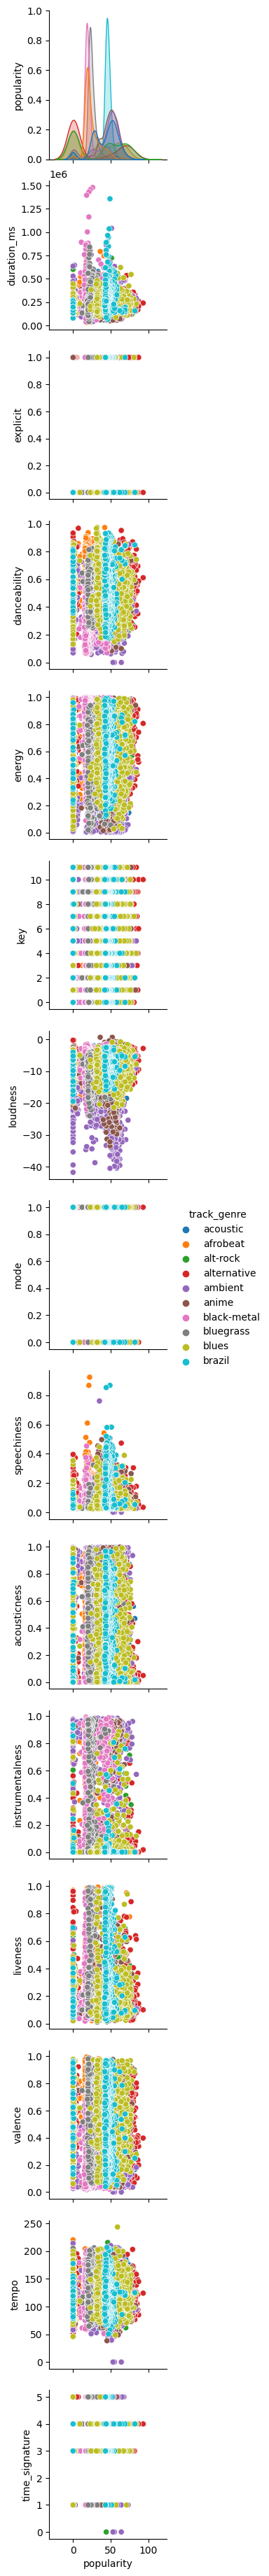

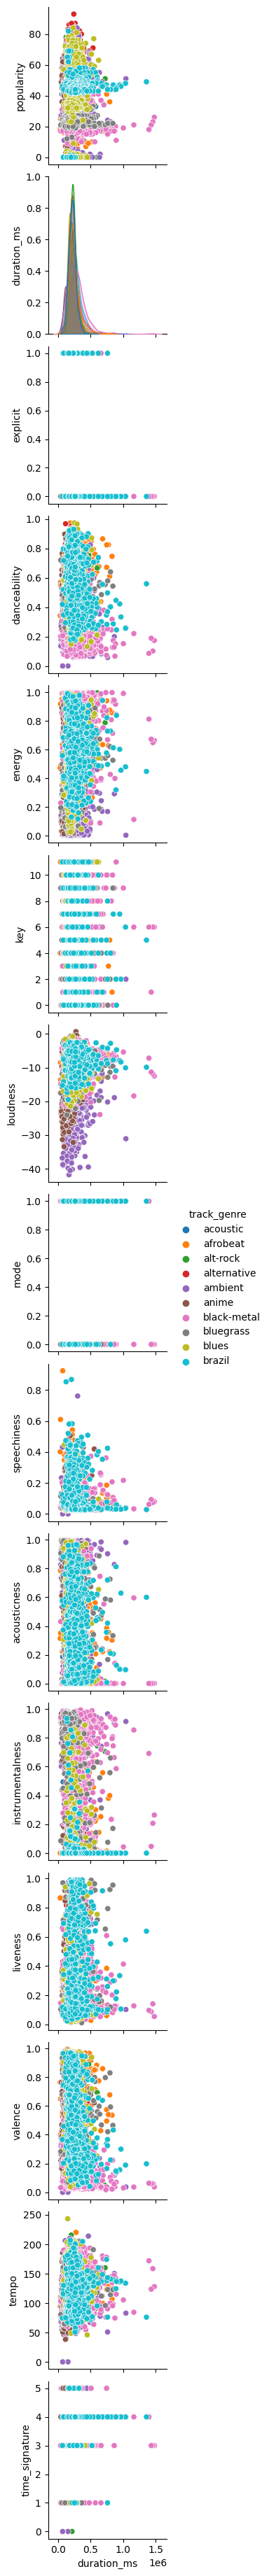

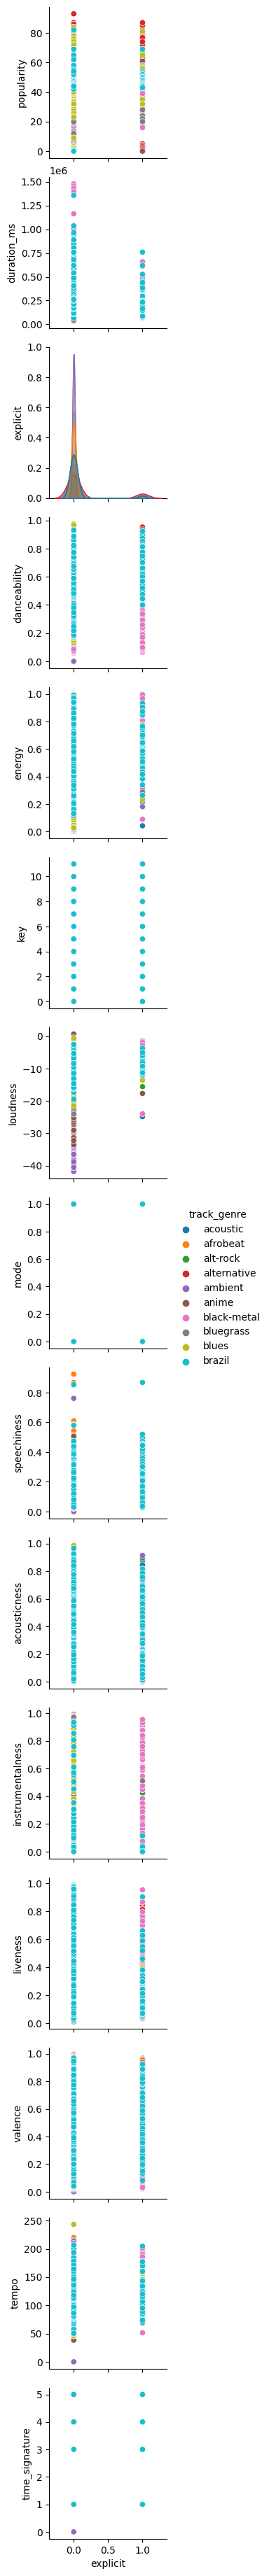

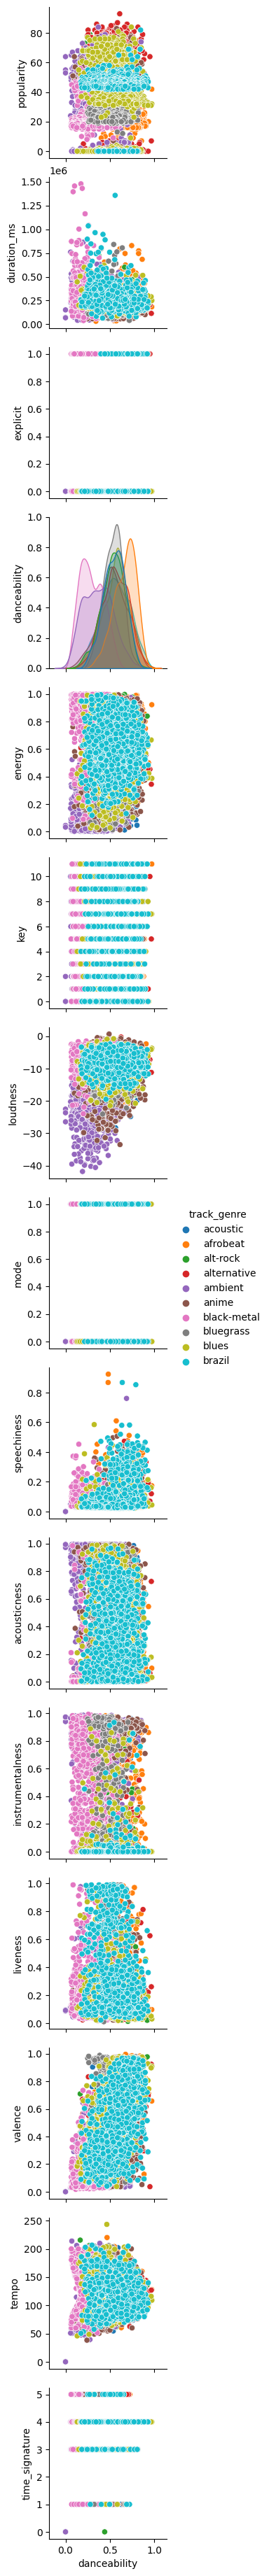

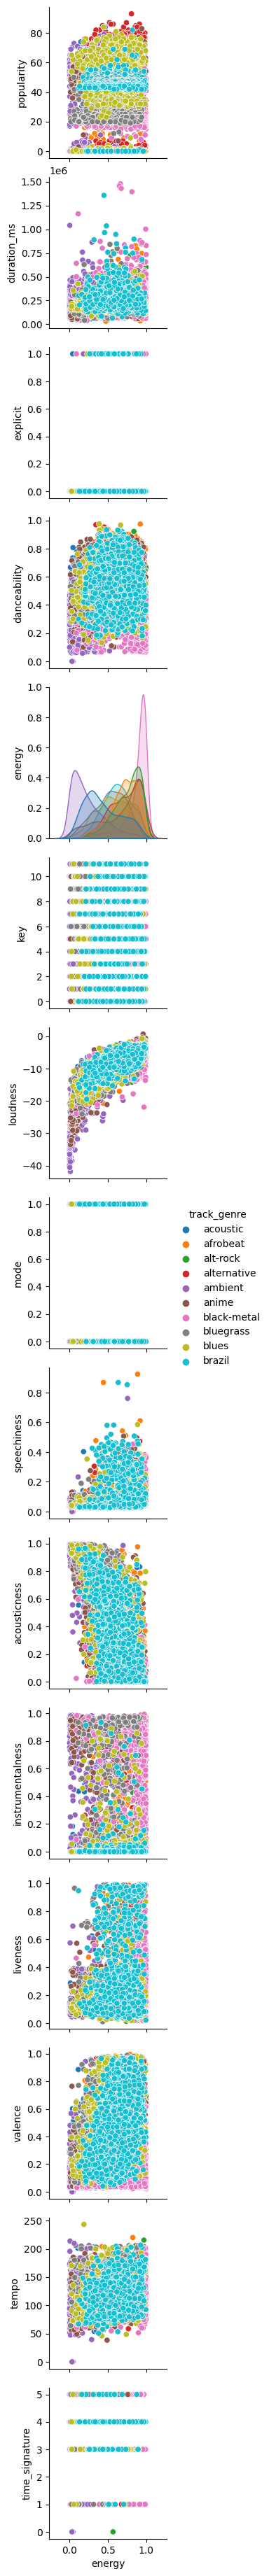

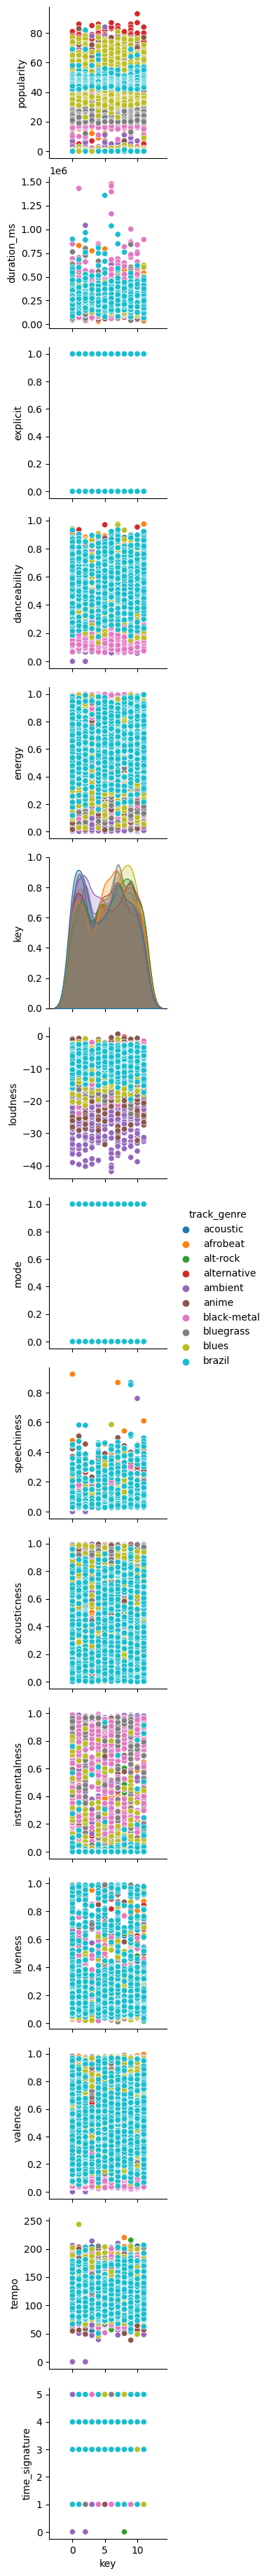

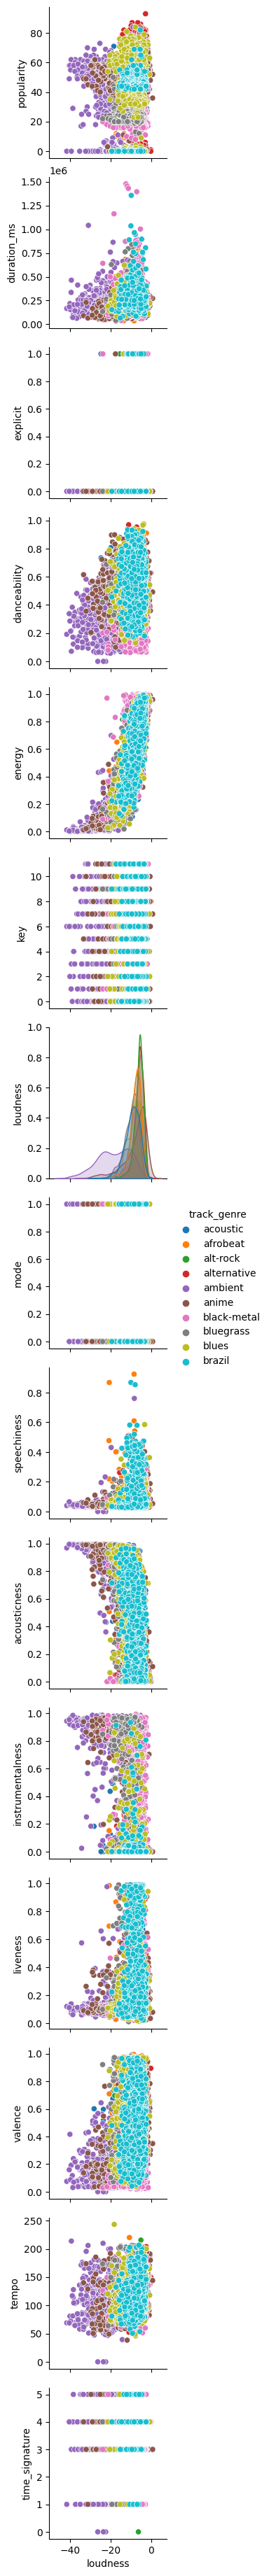

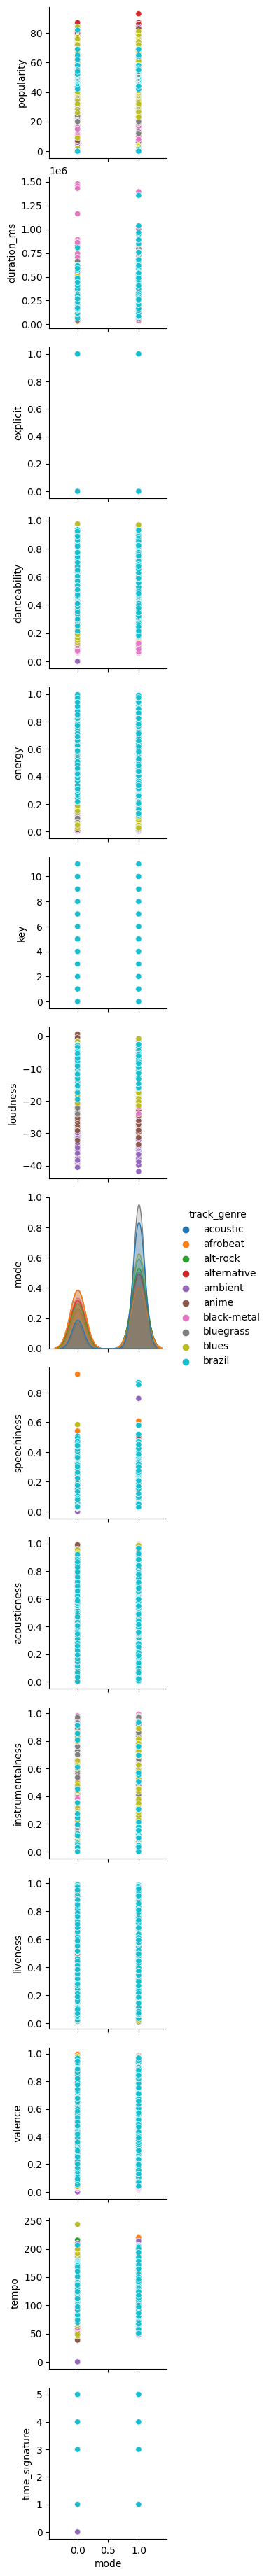

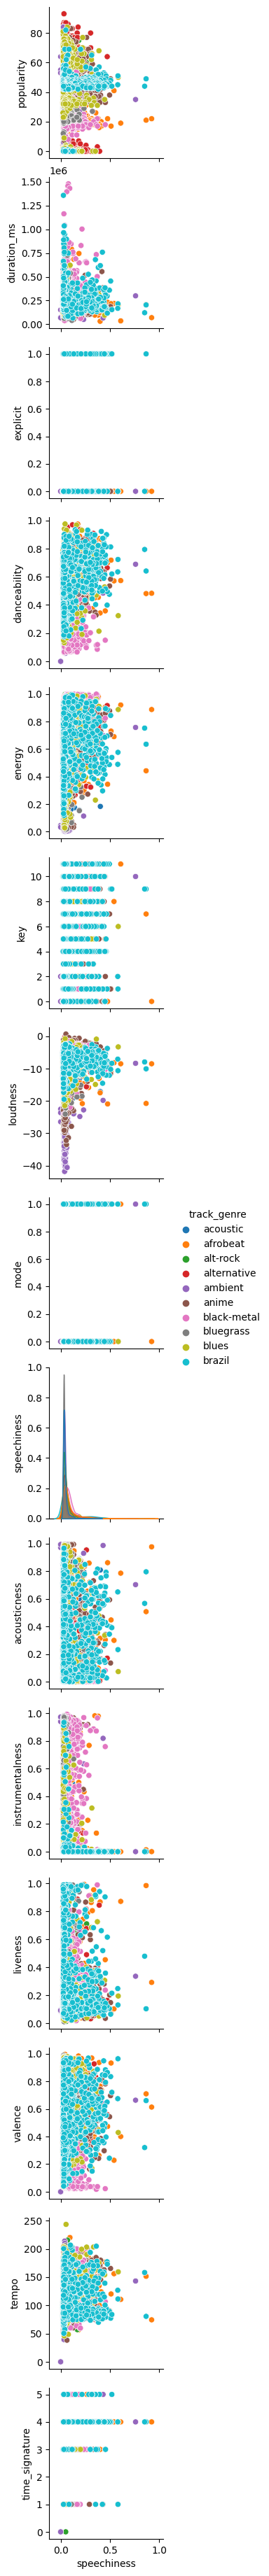

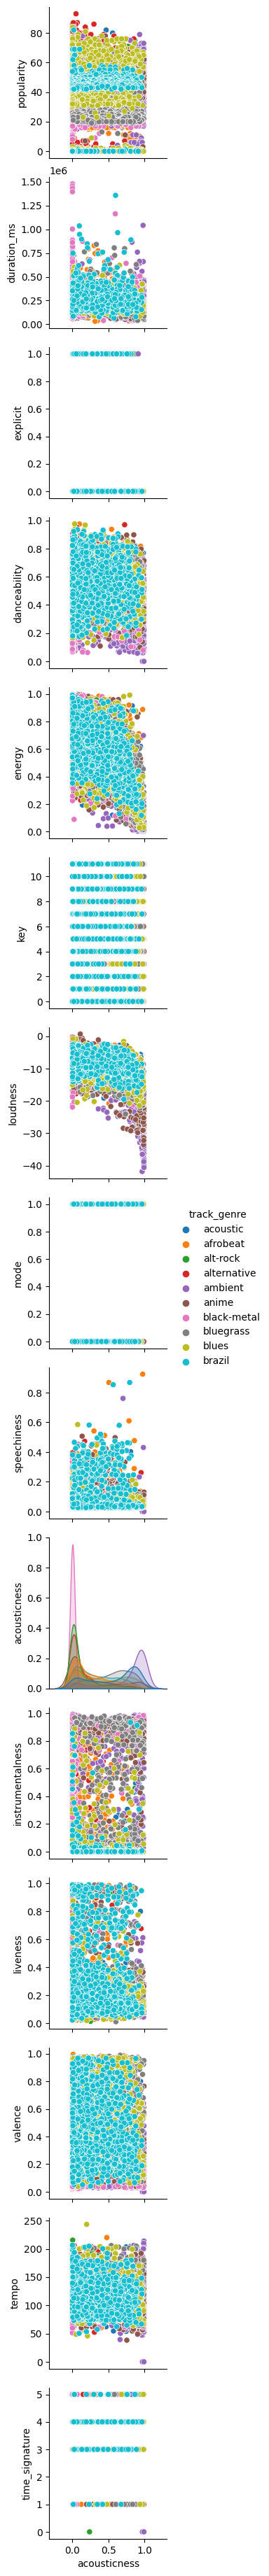

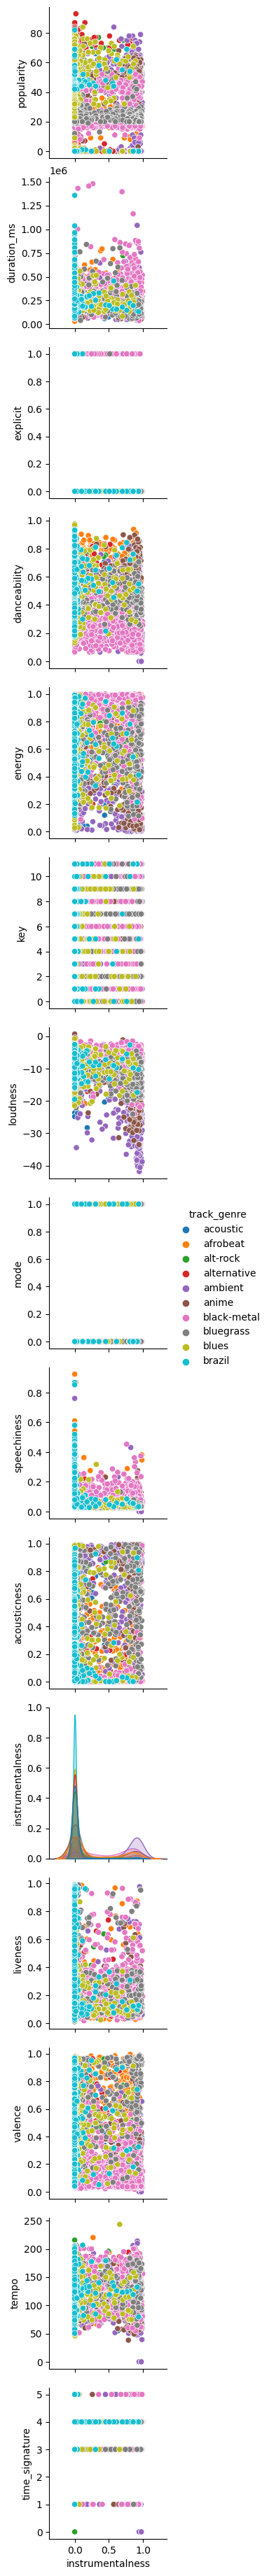

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F009FB72E0> (for post_execute):


KeyboardInterrupt: 

In [17]:
for i in process_data.columns:
    sns.pairplot(data=process_data, x_vars=i, hue="track_genre")
    plt.show()

In [ ]:
# correlation
sns.heatmap(process_data.corr(), annot=True)
plt.show() # my pc is very slow 

In [18]:
# counts
process_data.track_genre.unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil'],
      dtype=object)

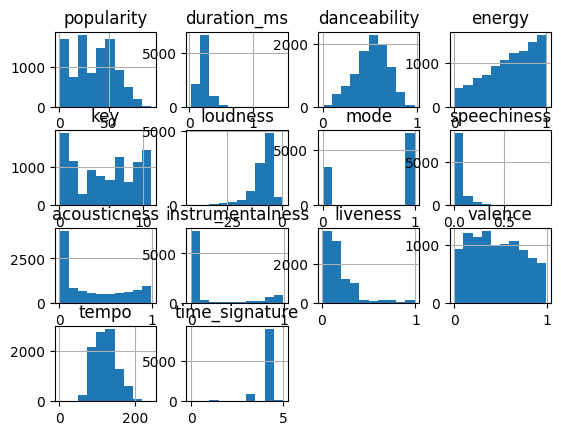

In [19]:
# histogram
process_data.hist()
plt.show()

In [35]:
# preprocess
process_data2 = process_data.copy()

In [36]:
process_data2

popularity  duration_ms  explicit  danceability  energy  ...  liveness  valence    tempo  time_signature  track_genre
0             73       230666     False         0.676  0.4610  ...    0.3580    0.715   87.917               4     acoustic
1             55       149610     False         0.420  0.1660  ...    0.1010    0.267   77.489               4     acoustic
2             57       210826     False         0.438  0.3590  ...    0.1170    0.120   76.332               4     acoustic
3             71       201933     False         0.266  0.0596  ...    0.1320    0.143  181.740               3     acoustic
4             82       198853     False         0.618  0.4430  ...    0.0829    0.167  119.949               4     acoustic
...          ...          ...       ...           ...     ...  ...       ...      ...      ...             ...          ...
9995          42       252390     False         0.629  0.5810  ...    0.6810    0.299   86.005               4       brazil
9996          43       270791     False         0.647  0.4590  ...    0.1900    0.201  135.824               4       brazil
9997          42       251493     False         0.652  0.7800  ...    0.1860    0.656  112.680               4       brazil
9998          42       267306     False         0.773  0.9400  ...    0.1900    0.887   97.135               4       brazil
9999          44       261866     False         0.674  0.4370  ...    0.0713    0.844  117.738               4       brazil

[10000 rows x 16 columns]

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols = process_data2.describe().columns
process_data2[cols] = scaler.fit_transform(process_data2[cols])
process_data2

popularity  duration_ms  explicit  danceability  ...   valence     tempo  time_signature  track_genre
0       0.784946     0.137436     False      0.693333  ...  0.718593  0.361245             0.8     acoustic
1       0.591398     0.081412     False      0.430769  ...  0.268342  0.318397             0.8     acoustic
2       0.612903     0.123723     False      0.449231  ...  0.120603  0.313643             0.8     acoustic
3       0.763441     0.117577     False      0.272821  ...  0.143719  0.746758             0.6     acoustic
4       0.881720     0.115448     False      0.633846  ...  0.167839  0.492863             0.8     acoustic
...          ...          ...       ...           ...  ...       ...       ...             ...          ...
9995    0.451613     0.152452     False      0.645128  ...  0.300503  0.353389             0.8       brazil
9996    0.462366     0.165170     False      0.663590  ...  0.202010  0.558092             0.8       brazil
9997    0.451613     0.151832     False      0.668718  ...  0.659296  0.462995             0.8       brazil
9998    0.451613     0.162761     False      0.792821  ...  0.891457  0.399122             0.8       brazil
9999    0.473118     0.159001     False      0.691282  ...  0.848241  0.483778             0.8       brazil

[10000 rows x 16 columns]

In [38]:
# input output
y = process_data2.pop("track_genre")
X = process_data2

In [39]:
# shape control
X.shape, y.shape

((10000, 15), (10000,))

In [41]:
# get dummies
dummy_x = pd.get_dummies(data=X, columns=["explicit"], drop_first=True)
dummy_x

popularity  duration_ms  danceability    energy  ...   valence     tempo  time_signature  explicit_True
0       0.784946     0.137436      0.693333  0.460223  ...  0.718593  0.361245             0.8              0
1       0.591398     0.081412      0.430769  0.164797  ...  0.268342  0.318397             0.8              0
2       0.612903     0.123723      0.449231  0.358076  ...  0.120603  0.313643             0.8              0
3       0.763441     0.117577      0.272821  0.058244  ...  0.143719  0.746758             0.6              0
4       0.881720     0.115448      0.633846  0.442197  ...  0.167839  0.492863             0.8              0
...          ...          ...           ...       ...  ...       ...       ...             ...            ...
9995    0.451613     0.152452      0.645128  0.580396  ...  0.300503  0.353389             0.8              0
9996    0.462366     0.165170      0.663590  0.458220  ...  0.202010  0.558092             0.8              0
9997    0.451613     0.151832      0.668718  0.779683  ...  0.659296  0.462995             0.8              0
9998    0.451613     0.162761      0.792821  0.939913  ...  0.891457  0.399122             0.8              0
9999    0.473118     0.159001      0.691282  0.436188  ...  0.848241  0.483778             0.8              0

[10000 rows x 15 columns]

In [44]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)
y

array([0, 0, 0, ..., 9, 9, 9])

In [45]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, y_train.shape

((8000, 15), (8000,))

In [53]:
# svm
svc = SVC(gamma="auto", kernel="rbf", C=100, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred, multi_class="ovo"))

0.9211936981697718


In [56]:
# control overfitting
real = svc.predict_proba(X_train)
print(roc_auc_score(y_train, real, multi_class="ovo"))

0.9346771074206928


In [ ]:
# model is not overfitted

In [52]:
# show null prediction
seri = pd.Series(y)
seri.value_counts("1")

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
dtype: float64

In [57]:
# our svm model prediction is enough

In [73]:
# xgboost
xgb = XGBClassifier(n_estimators=20, max_depth=3, learning_rate=0.6, random_state=0, probability=True)
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred2, multi_class="ovo"))

[04:49:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "probability" } are not used.

0.9470604954834093


In [74]:
# overfit control
real = xgb.predict_proba(X_train)
print(roc_auc_score(y_train, real, multi_class="ovo"))

0.9684169767956518


In [78]:
# random forest classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=7, max_features="sqrt", random_state=0)
rf.fit(X_train, y_train)
y_pred3 = rf.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred3, multi_class="ovo"))

0.9322477818497696


In [79]:
# overfit control
real = rf.predict_proba(X_train)
print(roc_auc_score(y_train, real, multi_class="ovo"))

0.952757569347008


In [80]:
# if you want to improve your accuracy score you can use grid search but I dont need to use for these models.